In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info import Operator


In [2]:
def phase_oracle(n, indices_to_mark, name='Oracle'):
    qc=QuantumCircuit(n,name=name)
    oracle_matrix=np.identity(2**n)
    for index_to_mark in indices_to_mark:
        oracle_matrix[indices_to_mark,indices_to_mark]=-1
    qc.unitary(Operator(oracle_matrix),range(n))
    return qc

def diffuser(n):
    qc=QuantumCircuit(n,name="diffuser_V")
    qc.h(range(n))
    qc.append(phase_oracle(n,[0]),range(n))
    qc.h(range(n))
    return qc

def grover(n, marked):
    qc=QuantumCircuit(n,n)
    r=int(np.round(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2))
    print(f'{n} qubits, basis state {marked} marked, {r} rounds')
    qc.h(range(n))
    for _ in range(r):
        qc.append(phase_oracle(n,marked), range(n))
        qc.append(diffuser(n),range(n))
    qc.measure(range(n), range(n))
    return qc

5 qubits, basis state [20] marked, 4 rounds


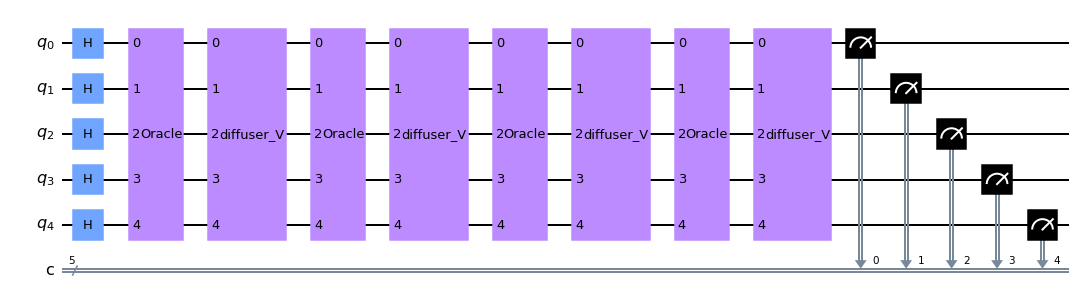

In [3]:
n=5
x =np.random.randint(2**n)
marked=[x]
qc=grover(n,marked)

qc.draw()

{'01011': 1, '10101': 1, '10110': 1, '10100': 9993, '11100': 1, '11000': 1, '10010': 1, '11011': 1}
3.919534679768385


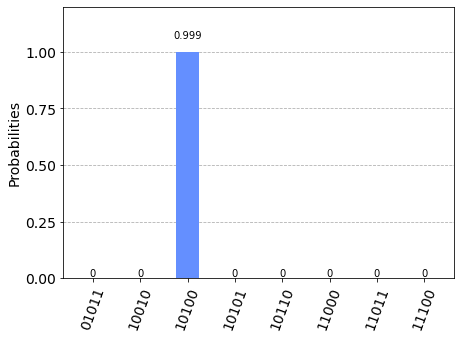

In [4]:
backend=Aer.get_backend('qasm_simulator')
shots=10000

results=execute(qc, backend=backend, shots=shots).result()
counts=results.get_counts(qc)

print(counts)
print(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2)

plot_histogram(counts)


we don't obtain a probability of 1 for the state we are looking for because r is not an integer